IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency

IMPORTING THE DATASET AS HEALTH

In [2]:
health = pd.read_csv("healthcare_dataset.csv")
health

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


VIEWING THE DATAFRAME INFORMATION

In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

The dataframe has 55500 samples and 15 variables(3 continuous and 12 categorical)

CENTRAL TENDENCY AND DISTRIBUTION OF AGE AND ROOM NUMBER

In [4]:
#Finding the central tendency
health.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [9]:
#mode for age
age =health['Age'].mode()[0]
print(f"age mode is {age}")

room = health['Room Number'].mode()[0]
print(f"room number mode is {room}")

age mode is 38
room number mode is 393


The central tendency for Age(mean =51.539459 and median =52.000000) shows that the mean is less than the median therefore negatively skewed

The central tendency for Room Number(mean =301.134829 and median =302.000000) shows that the mean is less than the median therefore also negatively skewed

vISUAL DISTRIBUTION OF AGE

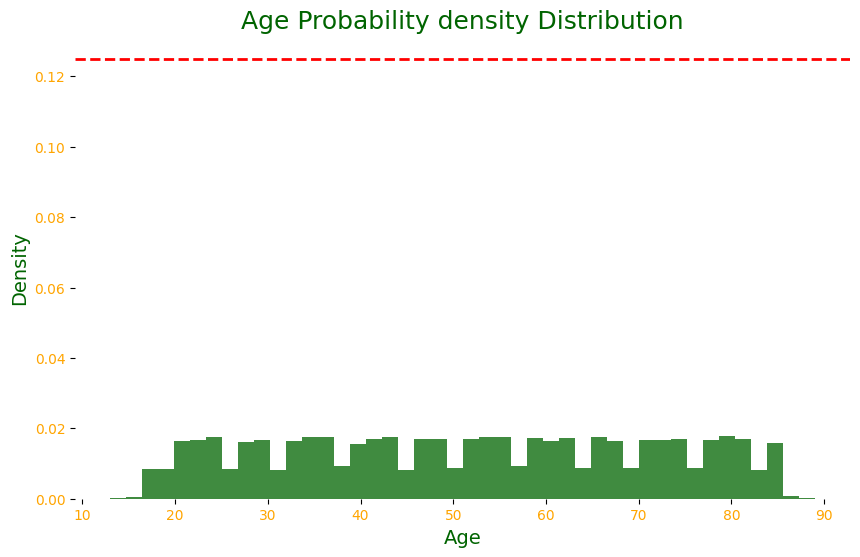

In [23]:
plt.figure(figsize=(10, 6))

# Plot the histogram for BMI
sns.histplot(health["Age"], kde=False, color='darkgreen', stat='density', linewidth=0)

# Adding a horizontal line at y=1/8 (12.5% probability)
plt.axhline(1 / 8, color="red", linestyle='--', linewidth=2)

# Remove left and bottom spines to eliminate the box just for better visual
sns.despine(left=True, bottom=True)

# Set labels and title
plt.xlabel("Age", fontsize=14, color='darkgreen')
plt.ylabel("Density", fontsize=14, color='darkgreen')  
plt.title("Age Probability density Distribution", fontsize=18, color='darkgreen')

# Set the color of tick labels on both axes
plt.xticks(color='orange')
plt.yticks(color='orange')

# Display the plot
plt.show()

VISUALLY SHOWING DISTRIBUTION OF ROOM NUMBER

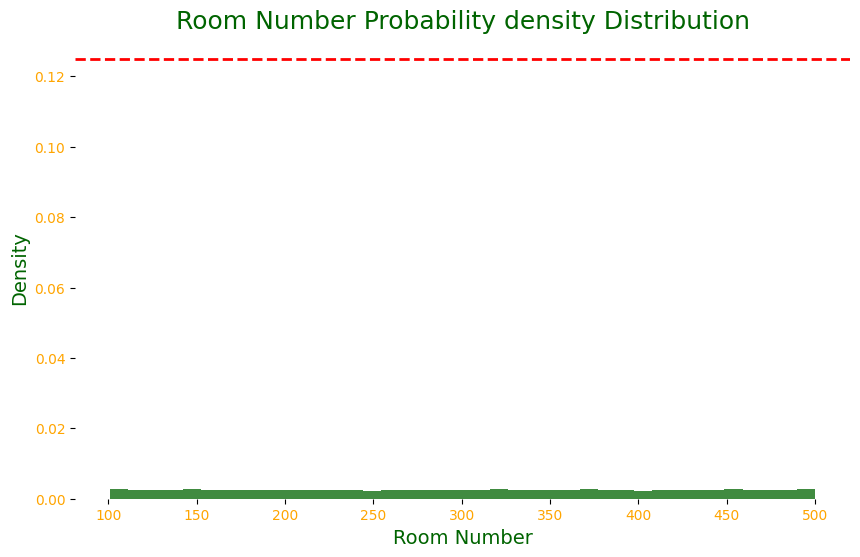

In [26]:
plt.figure(figsize=(10, 6))

# Plot the histogram for BMI
sns.histplot(health["Room Number"], kde=False, color='darkgreen', stat='density', linewidth=0)

# Adding a horizontal line at y=1/8 (12.5% probability)
plt.axhline(1 / 8, color="red", linestyle='--', linewidth=2)

# Remove left and bottom spines to eliminate the box just for better visual
sns.despine(left=True, bottom=True)

# Set labels and title
plt.xlabel("Room Number", fontsize=14, color='darkgreen')
plt.ylabel("Density", fontsize=14, color='darkgreen')  
plt.title("Room Number Probability density Distribution", fontsize=18, color='darkgreen')

# Set the color of tick labels on both axes
plt.xticks(color='orange')
plt.yticks(color='orange')

# Display the plot
plt.show()

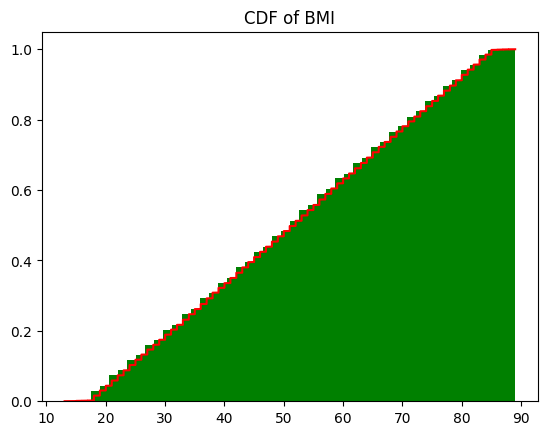

In [28]:
plt.hist(health.Age,bins=50,label='Age',color="green",cumulative = True,density=True, stacked=True)
sorted_data = np.sort(health.Age)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of Age')
plt.show()

MARGINAL PROBABILITY OF AGE 

In [15]:
max = health['Age'].max()
print(f"Maximum is {max}")
min = health['Age'].min()
print(f"The minimum is {min}")

#Creating bins
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

#create new column to have the bin data
age_bin = pd.cut(health['Age'], bins = bins, labels = labels, right =False)

#calculate the marginal probabilities

age_probabilities = age_bin.value_counts(normalize=True).sort_index()
print("The marginal probabilities for Age are: ", age_probabilities)


Maximum is 89
The minimum is 13
The marginal probabilities for LoanAmount are:  Age
10-20    0.030505
20-30    0.144144
30-40    0.147369
40-50    0.146486
50-60    0.150450
60-70    0.147333
70-80    0.145441
80-90    0.088270
Name: proportion, dtype: float64


The highest age probability is 50-60 with 0.150450 and the lowest age probability is 10-20 with  0.030505

MARGINAL PROBAILITY FOR ROOM NUMBER

In [16]:
max = health['Room Number'].max()
print(f"Maximum is {max}")
min = health['Room Number'].min()
print(f"The minimum is {min}")

Maximum is 500
The minimum is 101


In [19]:
max = health['Room Number'].max()
print(f"Maximum is {max}")
min = health['Room Number'].min()
print(f"The minimum is {min}")

#Creating bins
bins_r = [100, 150, 200, 250, 300, 350, 400, 450, 500]
labels_r = ['100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500']

#create new column to have the bin data
room_bin = pd.cut(health['Room Number'], bins = bins_r, labels = labels_r, right =False)

#calculate the marginal probabilities

room_probabilities = room_bin.value_counts(normalize=True).sort_index()
print("The marginal probabilities for Room Number are: ", room_probabilities)


Maximum is 500
The minimum is 101
The marginal probabilities for Room Number are:  Room Number
100-150    0.121305
150-200    0.123291
200-250    0.125621
250-300    0.124212
300-350    0.127210
350-400    0.127643
400-450    0.126379
450-500    0.124339
Name: proportion, dtype: float64


The probability of getting a room number of 350-400 is highest with 0.127643 and the probaility of getting a room number of 100-150 is lowest with  0.121305

THE RELATIONSHIP THE 'MEDICAL CONDITION' AND 'ADMISSION TYPE'

VISUALISING THE RELATIONSHIP USING A BARPLOT

Text(0.5, 1.0, 'Relationship between Medical Condition and Admission Type')

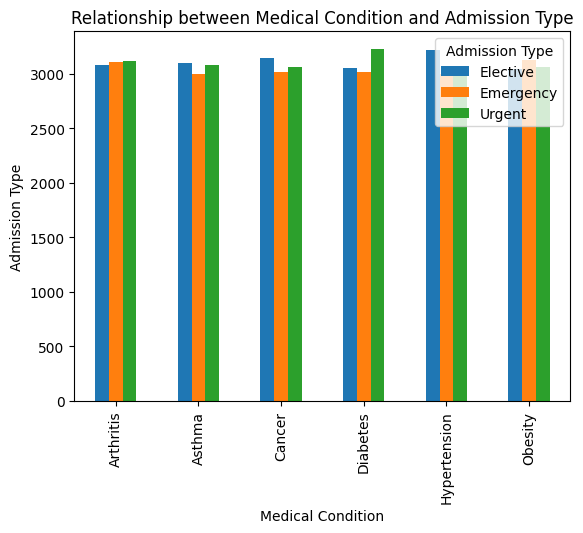

In [20]:

#Generate a contigency table (which is a cross tabulation of string data to numeric)
crosstab = pd.crosstab(index = health['Medical Condition'], columns= health['Admission Type'])

#Use contigeny table to generate barplot
%matplotlib inline
crosstab.plot.bar()

#Add title and axes labels to barplot
plt.xlabel('Medical Condition')
plt.ylabel('Admission Type')
plt.title('Relationship between Medical Condition and Admission Type')

For Arthritis, admission type is almost balanced across all although the highest is urgent and lowest elective.
For Asthma, elective admission type is the highest and emergency the lowest.
For cancer, elective is the highest admission type and the lowest admission type is emergency
For Diabetes, urgent is the highest admission type and emergency is the lowest
For Hypertension, patients are most admitted in the elective category and least admitted in the emergency category
For Obesity, patients are most admitted under the elective category and least admitted in the elective category

CARRYING OUT A STATISTICAL TEST

In [21]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     19.338
p-value:            0.036172
degrees of freedom: 10
expected frequencies:
 [[3128.66198198 3063.92526126 3115.41275676]
 [3087.31846847 3023.43720721 3074.24432432]
 [3101.43576577 3037.2623964  3088.30183784]
 [3127.31747748 3062.60857658 3114.07394595]
 [3107.48603604 3043.18747748 3094.32648649]
 [3102.78027027 3038.57908108 3089.64064865]]


The p_value is less than 0.05 therefore Medical Condition and Admission Type are correlated